### Import of Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import shap
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
# =========================
# STEP 1: Load preprocessed dataset
# =========================
df = pd.read_csv("C:/Users/HP/Documents/Volcanoe/Kilauea with labels.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

In [3]:
# =========================
# STEP 2: Basic cleaning
# =========================
df.drop_duplicates(inplace=True)

Label distribution:
eruption_label
1    17534
0      635
Name: count, dtype: int64


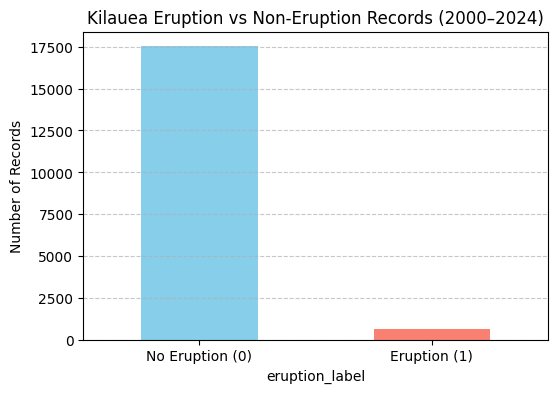

In [4]:
# =========================
# STEP 3: Check label distribution
# =========================
label_counts = df['eruption_label'].value_counts()
print("Label distribution:")
print(label_counts)

# Visualize distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No Eruption (0)', 'Eruption (1)'], rotation=0)
plt.ylabel("Number of Records")
plt.title("Kilauea Eruption vs Non-Eruption Records (2000–2024)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# =========================
# STEP 4: Feature selection
# =========================
# Select numerical features (adjust if needed)
features = ['brightness', 'scan', 'track', 'bright_t31', 'frp']
X = df[features]
y = df['eruption_label']

# Handle missing feature values
X = X.fillna(0)

### Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Features and labels
X = df[['latitude', 'longitude', 'brightness', 'scan', 'track', 
        'bright_t31', 'frp', 'year']]  
y = df['eruption_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Data Balancing with SMOTE

In [7]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {y_train_bal.value_counts().to_dict()}")

Before SMOTE: {1: 14027, 0: 508}
After SMOTE: {1: 14027, 0: 14027}


In [8]:
# =========================
# STEP 7: Train model
# =========================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0     0.6548    0.8661    0.7458       127
           1     0.9951    0.9835    0.9892      3507

    accuracy                         0.9794      3634
   macro avg     0.8249    0.9248    0.8675      3634
weighted avg     0.9832    0.9794    0.9807      3634



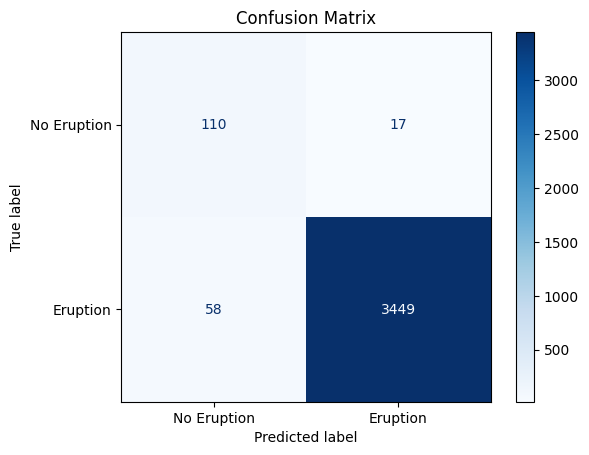

In [9]:
# =========================
# STEP 8: Evaluate model
# =========================
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Eruption', 'Eruption'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Model Explanability usnng SHAP

In [ ]:
import shap

# Create SHAP explainer for the trained model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot for the "eruption" class (class 1)
shap.summary_plot(
    shap_values[1], 
    X_test, 
    feature_names=['latitude', 'longitude', 'brightness', 'scan', 'track', 'bright_t31', 'frp', 'year']
)

# Optional: Bar plot of average feature importance
shap.summary_plot(
    shap_values[1], 
    X_test, 
    feature_names=['latitude', 'longitude', 'brightness', 'scan', 'track', 'bright_t31', 'frp', 'year'], 
    plot_type="bar"
)


In [14]:
pip install --upgrade scikit-learn imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip




   ---------------------------------------- 0/2 [sklearn-compat]
  Attempting uninstall: imbalanced-learn
   ---------------------------------------- 0/2 [sklearn-compat]
    Found existing installation: imbalanced-learn 0.11.0
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
    Uninstalling imbalanced-learn-0.11.0:
   -------------------- ------------------- 1/2 [imbalanced-learn]
      Successfully uninstalled imbalanced-learn-0.11.0
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   --

In [16]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.1 MB/s eta 0:00:02
   ----------------------------- ---------- 1.3/1.8 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1
Note: you may need to restart the kernel to use updated packages.
